In [1]:
import os
import glob
import time
from datetime import datetime

import torch
import numpy as np
import pandas as pd

from State import State
from GenerateDemandMonthly import GenerateDemandMonthly

from PPO import PPO

Device set to : NVIDIA GeForce RTX 3070


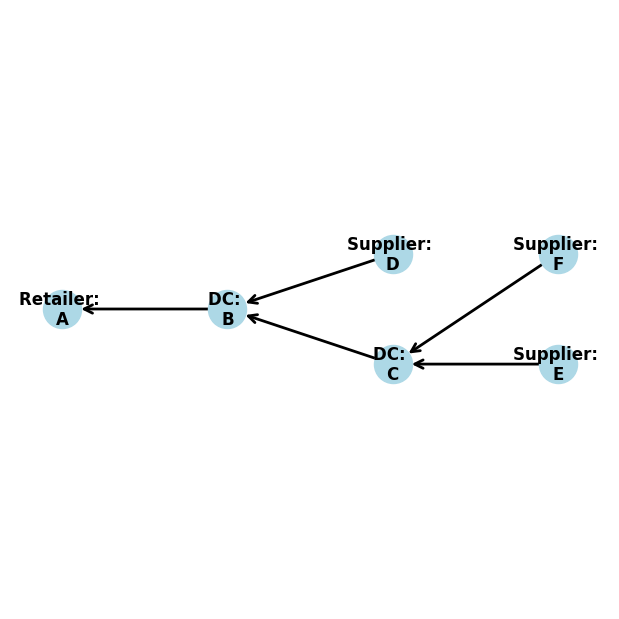

In [2]:
env = State()
env.create_state([-1, 0, 1, 1, 2, 2])
env.show_network()

In [3]:
has_continuous_action_space = False # continuous action space; else discrete
action_std = 0.6            # starting std for action distribution (Multivariate Normal)
action_std_decay_rate = 0.03       # linearly decay action_std (action_std = action_std - action_std_decay_rate)
min_action_std = 0.03               # minimum action_std (stop decay after action_std <= min_action_std)
action_std_decay_freq = int(1e5)  # action_std decay frequency (in num timesteps
eps_clip = 0.2          # clip parameter for PPO
gamma = 0.99            # discount factor
K_epochs = 20
lr_actor = 0.00005      # learning rate for actor network
lr_critic = 0.0001       # learning rate for critic network

random_seed = 1234         # set random seed if required (0 = no random seed)

state_dim = 9
action_dim = 512

In [4]:
torch.manual_seed(random_seed)
np.random.seed(random_seed)

ppo_agent = PPO(state_dim, action_dim, lr_actor, lr_critic, gamma, K_epochs, eps_clip, has_continuous_action_space, action_std)
ppo_agent.policy_old.load_state_dict(torch.load("rlmodel2.pt"))
ppo_agent.policy.load_state_dict(torch.load("rlmodel2.pt"))

<All keys matched successfully>

In [5]:
#### Generate New Demand ####
demand_generator = GenerateDemandMonthly()

df = pd.read_csv("../src/TOTALSA.csv")
mean = df['TOTALSA'].mean()
std = df['TOTALSA'].std()
period = 108
iterations = 100

demand_matrix = np.reshape(demand_generator.simulate_normal_no_season(\
            periods = period * iterations, mean=mean, std=std),\
                (iterations, period))

In [10]:
reward_RL = []

for demand_list in demand_matrix:
    reward_total = 0
    state = env.reset()
    env.set_demand_list(demand_list)
    done = False
    reward_sub = 0
    
    while not done:
        action = ppo_agent.select_action(state)
        state, reward, done = env.step(action)
        reward_sub += reward
        print(reward)
        if done:
            break
    reward_total += reward_sub
    reward_RL.append(reward_total)
        

678.5999999999999
459.1999999999998
1016.8
724.3999999999999
832.3999999999999
971.1999999999998
994.1999999999998
895.3999999999999
944.0
410.0
1037.8
1028.1999999999998
1036.1999999999998
581.5999999999999
679.3999999999999
810.0
930.5999999999999
1002.5999999999999
1126.8
633.1999999999998
1029.0
903.3999999999999
520.4
1517.8
988.8
712.3999999999999
931.1999999999998
426.5999999999999
710.0
1064.8
685.3999999999999
813.5999999999999
1152.8
1101.1999999999998
1174.1999999999998
759.0
909.0
625.3999999999999
849.1999999999998
1127.6
710.0
375.39999999999986
572.0
165.0
543.5999999999999
607.8
765.0
445.0
740.1999999999998
692.5999999999999
554.1999999999998
179.19999999999982
-152.80000000000018
174.0
-80.60000000000014
480.0
215.5999999999999
166.0
285.5999999999999
567.3999999999999
-23.200000000000045
202.0
400.5999999999999
289.0
527.1999999999998
-219.0
666.0
138.79999999999995
676.5999999999999
442.1999999999998
67.79999999999995
181.5999999999999
243.19999999999982
131.5999999

In [11]:
print(reward_RL)

[47785.79999999998, 71093.79999999999, 95311.59999999999, 88125.40000000004, 83464.0, 93296.39999999997, 93285.59999999999, 61378.600000000006, 87271.4, 83406.2, 91167.00000000003, 25586.39999999999, 77969.19999999995, 83630.60000000002, 78642.60000000002, 24492.599999999988, 20528.399999999994, 70863.19999999995, 47598.99999999997, 92793.39999999998, 75623.99999999999, 82616.19999999998, 73415.20000000004, 78917.0, 89082.59999999996, 93163.40000000001, 62282.2, 78016.40000000002, 88522.00000000003, 73222.79999999997, 63909.59999999997, 67943.99999999999, 81298.99999999999, 92550.79999999999, 81340.8, 70218.59999999995, 87887.20000000001, 72270.19999999995, 60953.39999999999, 63808.400000000016, 75314.79999999999, 87274.60000000002, 89548.60000000003, 91383.99999999999, 67659.59999999998, 86559.4, 88947.40000000005, 85276.0, 71035.4, 85533.6, 94119.8, 78556.80000000002, 53042.20000000002, 83533.59999999998, 92388.59999999999, 78287.40000000001, 77313.59999999998, 85831.59999999999, 894

In [12]:
print(np.mean(reward_RL))

74402.968


In [13]:
has_continuous_action_space = False # continuous action space; else discrete
action_std = 0.6            # starting std for action distribution (Multivariate Normal)
action_std_decay_rate = 0.03       # linearly decay action_std (action_std = action_std - action_std_decay_rate)
min_action_std = 0.03               # minimum action_std (stop decay after action_std <= min_action_std)
action_std_decay_freq = int(1e5)  # action_std decay frequency (in num timesteps
eps_clip = 0.2          # clip parameter for PPO
gamma = 0.99            # discount factor
K_epochs = 20
lr_actor = 0.00005      # learning rate for actor network
lr_critic = 0.0001       # learning rate for critic network

random_seed = 1234         # set random seed if required (0 = no random seed)

state_dim = 9
action_dim = 512

In [14]:
torch.manual_seed(random_seed)
np.random.seed(random_seed)

ppo_agent = PPO(state_dim, action_dim, lr_actor, lr_critic, gamma, K_epochs, eps_clip, has_continuous_action_space, action_std)
ppo_agent.policy_old.load_state_dict(torch.load("rlmodel3.pt"))
ppo_agent.policy.load_state_dict(torch.load("rlmodel3.pt"))

<All keys matched successfully>

In [15]:
reward_RL = []

for demand_list in demand_matrix:
    reward_total = 0
    state = env.reset()
    env.set_demand_list(demand_list)
    done = False
    reward_sub = 0
    
    while not done:
        action = ppo_agent.select_action(state)
        state, reward, done = env.step(action)
        reward_sub += reward
        print(reward)
        if done:
            break
    reward_total += reward_sub
    reward_RL.append(reward_total)      


628.5999999999999
468.1999999999998
986.8
614.3999999999999
532.3999999999999
694.1999999999998
810.1999999999998
684.3999999999999
911.0
234.0
985.8
995.1999999999998
956.1999999999998
422.5999999999999
495.39999999999986
582.0
707.5999999999999
793.5999999999999
1112.8
487.1999999999998
690.0
517.3999999999999
802.5999999999999
671.5999999999999
863.8
612.3999999999999
843.1999999999998
140.5999999999999
435.0
860.8
386.39999999999986
572.5999999999999
1015.8
754.1999999999998
720.1999999999998
466.0
551.0
377.39999999999986
592.1999999999998
1157.6
657.0
734.3999999999999
782.0
-70.0
459.5999999999999
234.79999999999995
410.0
484.0
432.1999999999998
440.5999999999999
762.1999999999998
410.1999999999998
-124.80000000000018
208.0
257.39999999999986
262.0
373.5999999999999
182.0
209.5999999999999
571.3999999999999
153.79999999999995
228.0
278.5999999999999
218.0
484.1999999999998
-33.0
727.0
138.79999999999995
405.5999999999999
499.1999999999998
86.79999999999995
171.5999999999999
293.

In [16]:
print(reward_RL)

[41886.79999999999, 44192.80000000001, 46478.59999999998, 45583.400000000016, 22412.0, 39834.40000000001, 61307.599999999984, 48931.600000000006, 30349.400000000012, 40930.19999999999, 54293.0, 18702.399999999994, 66022.2, 40146.600000000006, 26702.600000000006, 34918.6, 30952.399999999987, 20751.2, 26827.999999999996, 36561.400000000016, 55533.99999999997, 51780.19999999999, 36459.20000000003, 41454.999999999985, 23098.59999999999, 2923.3999999999896, 40244.200000000004, -3172.5999999999976, 35787.999999999985, 42585.79999999997, 23814.59999999999, 29939.0, 53683.99999999999, 32307.799999999985, 52194.80000000001, 43041.599999999984, 11621.2, 46386.19999999998, 35264.39999999999, 40899.40000000002, 33455.79999999998, 37183.6, 52409.600000000006, 34469.99999999999, 40996.6, 49201.40000000001, 60199.40000000003, 26138.000000000007, 42602.400000000016, 33989.60000000001, 68161.79999999999, 51655.80000000001, 55068.20000000002, 37791.6, 43257.59999999999, 42334.4, 29008.6, 30939.600000000

In [17]:
print(np.mean(reward_RL))

39233.657999999996


In [7]:
reward_RL = []
for demand in demand_test:
    reward_total = 0
    for i in range(2):
        env = MultiEchelonInvOptEnv(demand[i*2:i*2+2])
        state = env.reset()
        done = False
        reward_sub = 0
        while not done:
            action = ppo_agent.select_action(state)
            state, reward, done = env.step(action)
            reward_sub += reward
            if done:
                break
        reward_total += reward_sub
    reward_RL.append(reward_total)

NameError: name 'demand_test' is not defined